<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_project/blob/main/3_EDA_%EB%B0%8F_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My Drive/4조 프로젝트 정리

/content/drive/My Drive/4조 프로젝트 정리


In [ ]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,194 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. EDA

## 1.1 PCA

### 1.1.1 모델링 데이터 PCA 시각화


In [ ]:
# 데이터셋 불러오기
a1 = pd.read_csv("/content/drive/MyDrive/4조 프로젝트/사고데이터 및 바닥신호등 폴더/설치법정동사고감소율그룹2.csv")
a2 = pd.read_csv("/content/drive/MyDrive/4조 프로젝트/2019전처리완료데이터/2019최종데이터.csv")

df = pd.merge(a1.iloc[:,[1,5]], a2, how = "left", left_on = "동", right_on = "법정동")
df = df.drop(["동"],axis = 1)
df = df.set_index("법정동") # 법정동을 인덱스로 설정
df = df.rename(columns = {"group":"최적입지순위그룹"}) # group 변수 이름 변경
df

,최적입지순위그룹,주민등록수,주간생활인구수,야간생활인구수,횡단보도수,자동차보유대수,면적,야간사고위험도,전체평균연령,교차로수,안전지수
법정동,,,,,,,,,,,
개포동,C,42402.833333,4.799043e+05,4.300811e+05,175.0,18528,5426653.884,C,43.075,50.0,71.33
논현동,B,45696.000000,1.353430e+06,8.039621e+05,295.0,21139,2715206.118,A,41.900,35.0,71.33
대치동,C,90824.333333,1.730957e+06,1.103471e+06,334.0,38750,3789492.498,B,40.050,58.0,71.33
삼성동,B,45594.000000,1.424145e+06,6.720892e+05,318.0,21297,3188110.934,A,40.650,43.0,71.33
세곡동,C,15021.333333,1.672056e+05,1.686816e+05,65.0,5607,2418556.760,C,40.000,13.0,71.33
...,...,...,...,...,...,...,...,...,...,...,...
면목동,C,140803.000000,1.430781e+06,1.440331e+06,453.0,35838,6010917.241,A,45.000,90.0,77.13
묵동,B,55917.000000,5.344037e+05,5.466784e+05,248.0,16834,1896210.745,B,43.250,46.0,77.13
상봉동,B,45343.000000,5.945805e+05,5.120843e+05,194.0,13582,1529367.767,B,42.600,23.0,77.13


In [ ]:
y1 = df["최적입지순위그룹"]
x1 = df.drop(["최적입지순위그룹"],axis = 1)

In [ ]:
# 범주형변수 더미화
x1 = pd.get_dummies(x1, drop_first = True)
x1

,주민등록수,주간생활인구수,야간생활인구수,횡단보도수,자동차보유대수,면적,전체평균연령,교차로수,안전지수,야간사고위험도_B,야간사고위험도_C
법정동,,,,,,,,,,,
개포동,42402.833333,4.799043e+05,4.300811e+05,175.0,18528,5426653.884,43.075,50.0,71.33,0,1
논현동,45696.000000,1.353430e+06,8.039621e+05,295.0,21139,2715206.118,41.900,35.0,71.33,0,0
대치동,90824.333333,1.730957e+06,1.103471e+06,334.0,38750,3789492.498,40.050,58.0,71.33,1,0
삼성동,45594.000000,1.424145e+06,6.720892e+05,318.0,21297,3188110.934,40.650,43.0,71.33,0,0
세곡동,15021.333333,1.672056e+05,1.686816e+05,65.0,5607,2418556.760,40.000,13.0,71.33,0,1
...,...,...,...,...,...,...,...,...,...,...,...
면목동,140803.000000,1.430781e+06,1.440331e+06,453.0,35838,6010917.241,45.000,90.0,77.13,0,0
묵동,55917.000000,5.344037e+05,5.466784e+05,248.0,16834,1896210.745,43.250,46.0,77.13,1,0
상봉동,45343.000000,5.945805e+05,5.120843e+05,194.0,13582,1529367.767,42.600,23.0,77.13,1,0


In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# 데이터 변환
x1.iloc[:,[0,1,2,3,4,5,7]] = np.sqrt(x1.iloc[:,[0,1,2,3,4,5,7]])
x1.iloc[:,6] = np.log1p(x1.iloc[:,6])
# 데이터 스케일링
scaler = RobustScaler()
x1.iloc[:,:9] = scaler.fit_transform(x1.iloc[:,:9]) 



In [ ]:
# 2차원으로 차원축소
pca=PCA(n_components=2)
pca.fit(x1)

# PCA 주성분 설명력 출력
print(pca.explained_variance_ratio_)
#[0.63903518 0.11673774]. 합하면 약 76%의 설명력

[0.63903518 0.11673774]


In [ ]:
# 데이터프레임으로 자료형 변경
md_pca=pca.transform(x1)
md_pca=pd.DataFrame(md_pca,columns=['component0','component1'])

md_pca

,component0,component1
0,0.436438,-0.339651
1,0.987831,-0.557553
2,2.253102,-1.074046
3,1.081974,-1.025934
4,-1.729765,-1.013492
...,...,...
65,3.133053,0.534986
66,0.673407,0.583105
67,0.052798,0.469336
68,1.146753,0.420499


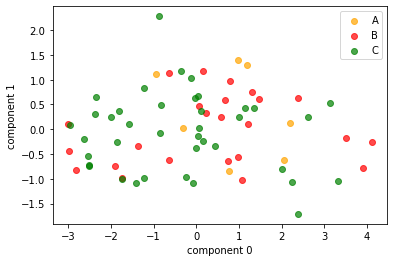

In [ ]:
# class 정보 불러오기
md_pca["target"] = np.array(y1)

# target 별 분리
md_pca_0=md_pca[md_pca["target"]=="A"]
md_pca_1=md_pca[md_pca["target"]=="B"]
md_pca_2=md_pca[md_pca["target"]=="C"]

#시각화
plt.scatter(md_pca_0['component0'],md_pca_0['component1'],
            color='orange',alpha=0.7,label='A')
plt.scatter(md_pca_1['component0'],md_pca_1['component1'],
            color='red',alpha=0.7,label='B')
plt.scatter(md_pca_2['component0'],md_pca_2['component1'],
            color='green',alpha=0.7,label='C')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

### 1.1.2 SMOTE 모델링 PCA 시각화







In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=999)
x2, y2 = smote.fit_resample(x1, y1)

In [ ]:
# pca에 데이터프레임으로 자료형 변경
df_pca=pca.transform(x2)
df_pca=pd.DataFrame(df_pca,columns=['component0','component1'])

df_pca

,component0,component1
0,0.436438,-0.339651
1,0.987831,-0.557553
2,2.253102,-1.074046
3,1.081974,-1.025934
4,-1.729765,-1.013492
...,...,...
112,1.536168,0.591705
113,0.750252,0.602167
114,0.493642,0.413454
115,0.626202,-0.275589


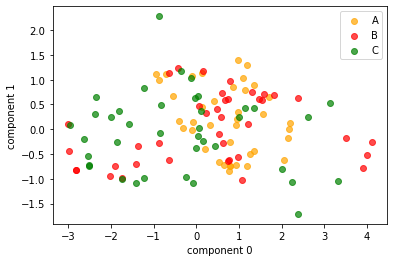

In [ ]:
# class 정보 불러오기
df_pca["target"]= np.array(y2)

# target 별 분리
df_pca_0=df_pca[df_pca["target"]=="A"]
df_pca_1=df_pca[df_pca["target"]=="B"]
df_pca_2=df_pca[df_pca["target"]=="C"]

#시각화
plt.scatter(df_pca_0['component0'],df_pca_0['component1'],
            color='orange',alpha=0.7,label='A')
plt.scatter(df_pca_1['component0'],df_pca_1['component1'],
            color='red',alpha=0.7,label='B')
plt.scatter(df_pca_2['component0'],df_pca_2['component1'],
            color='green',alpha=0.7,label='C')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

## 1.2 t-sne

In [ ]:
a1 = pd.read_csv("사고데이터 및 바닥신호등 폴더/설치법정동사고감소율그룹2.csv")
a2 = pd.read_csv("2019전처리완료데이터/2019최종데이터.csv")

In [ ]:
df = pd.merge(a1.iloc[:,[1,5]], a2, how = "left", left_on = "동", right_on = "법정동")
df = df.drop(["동"],axis = 1)
df = df.set_index("법정동") # 법정동을 인덱스로 설정
df = df.rename(columns = {"group":"최적입지순위그룹"}) # group 변수 이름 변경
df

,최적입지순위그룹,주민등록수,주간생활인구수,야간생활인구수,횡단보도수,자동차보유대수,면적,야간사고위험도,전체평균연령,교차로수,안전지수
법정동,,,,,,,,,,,
개포동,C,42402.833333,4.799043e+05,4.300811e+05,175.0,18528,5426653.884,C,43.075,50.0,71.33
논현동,B,45696.000000,1.353430e+06,8.039621e+05,295.0,21139,2715206.118,A,41.900,35.0,71.33
대치동,C,90824.333333,1.730957e+06,1.103471e+06,334.0,38750,3789492.498,B,40.050,58.0,71.33
삼성동,B,45594.000000,1.424145e+06,6.720892e+05,318.0,21297,3188110.934,A,40.650,43.0,71.33
세곡동,C,15021.333333,1.672056e+05,1.686816e+05,65.0,5607,2418556.760,C,40.000,13.0,71.33
...,...,...,...,...,...,...,...,...,...,...,...
면목동,C,140803.000000,1.430781e+06,1.440331e+06,453.0,35838,6010917.241,A,45.000,90.0,77.13
묵동,B,55917.000000,5.344037e+05,5.466784e+05,248.0,16834,1896210.745,B,43.250,46.0,77.13
상봉동,B,45343.000000,5.945805e+05,5.120843e+05,194.0,13582,1529367.767,B,42.600,23.0,77.13


In [ ]:
y = df["최적입지순위그룹"]
x = df.drop(["최적입지순위그룹"],axis = 1)

In [ ]:
# 범주형변수 더미화
x = pd.get_dummies(x, drop_first = True)
x

,주민등록수,주간생활인구수,야간생활인구수,횡단보도수,자동차보유대수,면적,전체평균연령,교차로수,안전지수,야간사고위험도_B,야간사고위험도_C
법정동,,,,,,,,,,,
개포동,42402.833333,4.799043e+05,4.300811e+05,175.0,18528,5426653.884,43.075,50.0,71.33,0,1
논현동,45696.000000,1.353430e+06,8.039621e+05,295.0,21139,2715206.118,41.900,35.0,71.33,0,0
대치동,90824.333333,1.730957e+06,1.103471e+06,334.0,38750,3789492.498,40.050,58.0,71.33,1,0
삼성동,45594.000000,1.424145e+06,6.720892e+05,318.0,21297,3188110.934,40.650,43.0,71.33,0,0
세곡동,15021.333333,1.672056e+05,1.686816e+05,65.0,5607,2418556.760,40.000,13.0,71.33,0,1
...,...,...,...,...,...,...,...,...,...,...,...
면목동,140803.000000,1.430781e+06,1.440331e+06,453.0,35838,6010917.241,45.000,90.0,77.13,0,0
묵동,55917.000000,5.344037e+05,5.466784e+05,248.0,16834,1896210.745,43.250,46.0,77.13,1,0
상봉동,45343.000000,5.945805e+05,5.120843e+05,194.0,13582,1529367.767,42.600,23.0,77.13,1,0


In [ ]:
x.describe()

,주민등록수,주간생활인구수,야간생활인구수,횡단보도수,자동차보유대수,면적,전체평균연령,교차로수,안전지수,야간사고위험도_B,야간사고위험도_C
count,70.000000,7.000000e+01,7.000000e+01,70.000000,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000
mean,47435.398016,6.844141e+05,5.403363e+05,183.600000,15540.528571,2.480446e+06,42.120026,39.528571,76.751143,0.385714,0.400000
std,38862.839261,5.890353e+05,4.268535e+05,144.300552,12852.942575,1.950595e+06,2.049383,30.943015,3.723365,0.490278,0.493435
min,3018.444444,6.556902e+04,4.652227e+04,20.000000,453.000000,1.145313e+05,37.700000,3.000000,71.330000,0.000000,0.000000
25%,17593.000000,2.019741e+05,1.894946e+05,65.500000,5758.500000,9.013387e+05,40.537500,21.000000,73.980000,0.000000,0.000000
50%,37953.666667,5.390278e+05,4.543531e+05,157.000000,12524.500000,2.024693e+06,42.012500,32.500000,77.240000,0.000000,0.000000
75%,68541.500000,8.738914e+05,7.083458e+05,261.000000,20816.250000,3.588484e+06,43.218750,51.750000,79.600000,1.000000,1.000000
max,192260.000000,2.534341e+06,1.813345e+06,678.000000,57465.000000,8.432109e+06,48.900000,173.000000,83.220000,1.000000,1.000000


### 1.2.1 smote 이전 t-sne 


In [ ]:
np.array(y)

array(['C', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C',
       'C', 'C', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'C', 'C', 'C',
       'C', 'B', 'C', 'B', 'A', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'B', 'B', 'C', 'B', 'C', 'C', 'A', 'B',
       'C', 'C', 'A', 'B', 'B', 'A', 'C', 'C', 'A', 'A', 'C', 'B', 'B',
       'C', 'B', 'B', 'C', 'B'], dtype=object)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# 데이터 변환
x.iloc[:,[0,1,2,3,4,5,7]] = np.sqrt(x.iloc[:,[0,1,2,3,4,5,7]])
x.iloc[:,6] = np.log1p(x.iloc[:,6])
# 데이터 스케일링
scaler = RobustScaler()
x.iloc[:,:9] = scaler.fit_transform(x.iloc[:,:9]) 


#### 2차원 시각화

In [ ]:
# 2차원으로 차원축소하는 모델 생성
model = TSNE(n_components=2,random_state = 999) 
tsne_df = model.fit_transform(x)

In [ ]:
# tsne 완료된 데이터 데이터프레임 변환

tsne_df = pd.DataFrame(tsne_df, columns = ["component0","component1"])
tsne_df

,component0,component1
0,22.354008,-0.850892
1,14.000647,-3.984603
2,-1.860242,35.436745
3,17.260475,-9.785224
4,-39.438465,-29.926565
...,...,...
65,-22.239983,34.892288
66,-6.541933,6.816985
67,-12.427439,2.327422
68,-5.886575,14.631059


In [ ]:
tsne_df["target"] = np.array(y)
tsne_df

,component0,component1,target
0,22.354008,-0.850892,C
1,14.000647,-3.984603,B
2,-1.860242,35.436745,C
3,17.260475,-9.785224,B
4,-39.438465,-29.926565,C
...,...,...,...
65,-22.239983,34.892288,C
66,-6.541933,6.816985,B
67,-12.427439,2.327422,B
68,-5.886575,14.631059,C


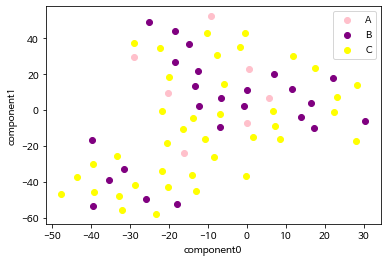

In [ ]:
# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == "A"]
tsne_df_1 = tsne_df[tsne_df['target'] == "B"]
tsne_df_2 = tsne_df[tsne_df['target'] == "C"]

# target 별 시각화
plt.scatter(tsne_df_0['component0'], tsne_df_0['component1'], color = 'pink', label = 'A')
plt.scatter(tsne_df_1['component0'], tsne_df_1['component1'], color = 'purple', label = 'B')
plt.scatter(tsne_df_2['component0'], tsne_df_2['component1'], color = 'yellow', label = 'C')

plt.xlabel('component0')
plt.ylabel('component1')
plt.legend()
plt.show()

#### 3차원 시각화

In [ ]:
# 2차원으로 차원축소하는 모델 생성
model2 = TSNE(n_components=3,random_state = 999) 

tsne_df2 = model2.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
# tsne 완료된 데이터 데이터프레임 변환(3차원 시각화할때)

tsne_df2 = pd.DataFrame(tsne_df2, columns = ["component0","component1","component2"])
tsne_df2

,component0,component1,component2
0,45.502304,-784.328857,-506.106262
1,363.974426,40.549580,-113.513535
2,267.639069,-85.730797,-185.359146
3,49.008278,71.941879,177.057648
4,2.437983,-45.366459,205.667587
...,...,...,...
65,-157.653946,81.853920,116.212296
66,109.108429,-64.661217,-172.695190
67,-36.420738,-82.726463,-38.772476
68,1405.499146,497.360199,1633.052734


In [ ]:
tsne_df2["target"] = np.array(y)
tsne_df2

,component0,component1,component2,target
0,45.502304,-784.328857,-506.106262,C
1,363.974426,40.549580,-113.513535,B
2,267.639069,-85.730797,-185.359146,C
3,49.008278,71.941879,177.057648,B
4,2.437983,-45.366459,205.667587,C
...,...,...,...,...
65,-157.653946,81.853920,116.212296,C
66,109.108429,-64.661217,-172.695190,B
67,-36.420738,-82.726463,-38.772476,B
68,1405.499146,497.360199,1633.052734,C


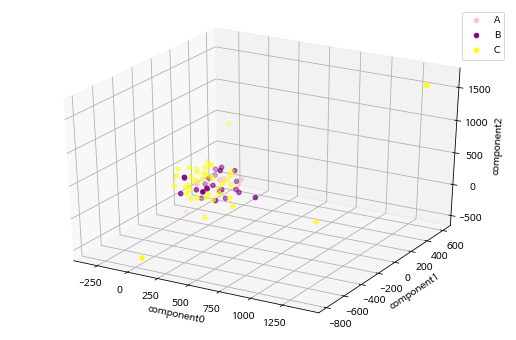

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# target 별 분리
tsne_df2_0 = tsne_df2[tsne_df2['target'] == "A"]
tsne_df2_1 = tsne_df2[tsne_df2['target'] == "B"]
tsne_df2_2 = tsne_df2[tsne_df2['target'] == "C"]

# target 별 시각화
ax.scatter(tsne_df2_0['component0'], tsne_df2_0['component1'], tsne_df2_0['component2'], color = 'pink', label = 'A')
ax.scatter(tsne_df2_1['component0'], tsne_df2_1['component1'], tsne_df2_1['component2'], color = 'purple', label = 'B')
ax.scatter(tsne_df2_2['component0'], tsne_df2_2['component1'], tsne_df2_2['component2'], color = 'yellow', label = 'C')

ax.set_xlabel('component0')
ax.set_ylabel('component1')
ax.set_zlabel('component2')
ax.legend()
plt.show()

### 1.2.2 smote 적용

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=999)
x, y = smote.fit_resample(x, y)

#### 2차원 시각화

In [ ]:
# 2차원으로 차원축소하는 모델 생성
model = TSNE(n_components=2,random_state = 999) 

tsne_df = model.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
# tsne 완료된 데이터 데이터프레임 변환

tsne_df = pd.DataFrame(tsne_df, columns = ["component0","component1"])
tsne_df

,component0,component1
0,0.365044,-0.155225
1,-4.719301,-3.560578
2,-5.783866,-4.975365
3,-4.723449,-3.838607
4,9.301349,-3.797708
...,...,...
112,-3.846247,-2.729796
113,0.896805,-6.344074
114,1.281090,-5.675748
115,-0.838742,-3.045988


In [ ]:
tsne_df["target"] = np.array(y)
tsne_df

,component0,component1,target
0,0.365044,-0.155225,C
1,-4.719301,-3.560578,B
2,-5.783866,-4.975365,C
3,-4.723449,-3.838607,B
4,9.301349,-3.797708,C
...,...,...,...
112,-3.846247,-2.729796,B
113,0.896805,-6.344074,B
114,1.281090,-5.675748,B
115,-0.838742,-3.045988,B


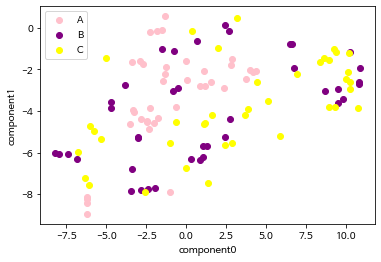

In [ ]:
# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == "A"]
tsne_df_1 = tsne_df[tsne_df['target'] == "B"]
tsne_df_2 = tsne_df[tsne_df['target'] == "C"]

# target 별 시각화
plt.scatter(tsne_df_0['component0'], tsne_df_0['component1'], color = 'pink', label = 'A')
plt.scatter(tsne_df_1['component0'], tsne_df_1['component1'], color = 'purple', label = 'B')
plt.scatter(tsne_df_2['component0'], tsne_df_2['component1'], color = 'yellow', label = 'C')

plt.xlabel('component0')
plt.ylabel('component1')
plt.legend()
plt.show()

#### 3차원 시각화

In [ ]:
# 2차원으로 차원축소하는 모델 생성
model2 = TSNE(n_components=3,random_state = 999) 

tsne_df2 = model2.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
# tsne 완료된 데이터 데이터프레임 변환(3차원 시각화할때)

tsne_df2 = pd.DataFrame(tsne_df2, columns = ["component0","component1","component2"])
tsne_df2

,component0,component1,component2
0,-124.350494,20.494041,-82.520775
1,-2.460395,10.872819,-174.908859
2,-142.560120,-106.687195,-50.026806
3,50.201847,-149.434387,-1.201590
4,55.224895,153.804138,4.405246
...,...,...,...
112,52.702469,-38.677296,85.056694
113,-10.676116,51.990398,117.768784
114,-0.476894,86.418304,74.070038
115,-57.140728,-24.609333,-2.162866


In [ ]:
tsne_df2["target"] = np.array(y)
tsne_df2

,component0,component1,component2,target
0,-124.350494,20.494041,-82.520775,C
1,-2.460395,10.872819,-174.908859,B
2,-142.560120,-106.687195,-50.026806,C
3,50.201847,-149.434387,-1.201590,B
4,55.224895,153.804138,4.405246,C
...,...,...,...,...
112,52.702469,-38.677296,85.056694,B
113,-10.676116,51.990398,117.768784,B
114,-0.476894,86.418304,74.070038,B
115,-57.140728,-24.609333,-2.162866,B


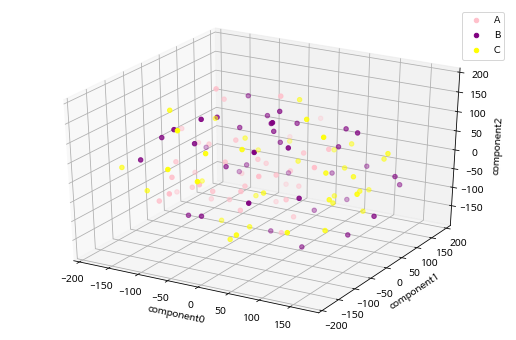

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# target 별 분리
tsne_df2_0 = tsne_df2[tsne_df2['target'] == "A"]
tsne_df2_1 = tsne_df2[tsne_df2['target'] == "B"]
tsne_df2_2 = tsne_df2[tsne_df2['target'] == "C"]

# target 별 시각화
ax.scatter(tsne_df2_0['component0'], tsne_df2_0['component1'], tsne_df2_0['component2'], color = 'pink', label = 'A')
ax.scatter(tsne_df2_1['component0'], tsne_df2_1['component1'], tsne_df2_1['component2'], color = 'purple', label = 'B')
ax.scatter(tsne_df2_2['component0'], tsne_df2_2['component1'], tsne_df2_2['component2'], color = 'yellow', label = 'C')

ax.set_xlabel('component0')
ax.set_ylabel('component1')
ax.set_zlabel('component2')
ax.legend()
plt.show()

# 2. 데이터 모델링

In [ ]:
a1 = pd.read_csv("사고데이터 및 바닥신호등 폴더/설치법정동사고감소율그룹2.csv")
a2 = pd.read_csv("2019전처리완료데이터/2019최종데이터.csv")

df = pd.merge(a1.iloc[:,[1,5]], a2, how = "left", left_on = "동", right_on = "법정동")
df = df.drop(["동"],axis = 1) # 필요없는 변수 삭제
df = df.set_index("법정동") # 법정동을 인덱스로 설정
df = df.rename(columns = {"group":"최적입지순위그룹","전체평균연령":"평균나이"}) # group 변수 이름 변경
df = df.iloc[:,[0,1,2,3,4,5,6,8,9,10,7]]
df

y1 = df["최적입지순위그룹"]
x1 = df.drop(["최적입지순위그룹"],axis = 1)

# 범주형변수 더미화
x1 = pd.get_dummies(x1, drop_first = True)
x1
# cv값 지정
from sklearn.model_selection import KFold

cv = KFold(n_splits = 4, shuffle = True, random_state = 42)

In [ ]:
a1.value_counts("group")

group
C    39
B    24
A     7
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=999)
x1, y1 = smote.fit_resample(x1, y1)

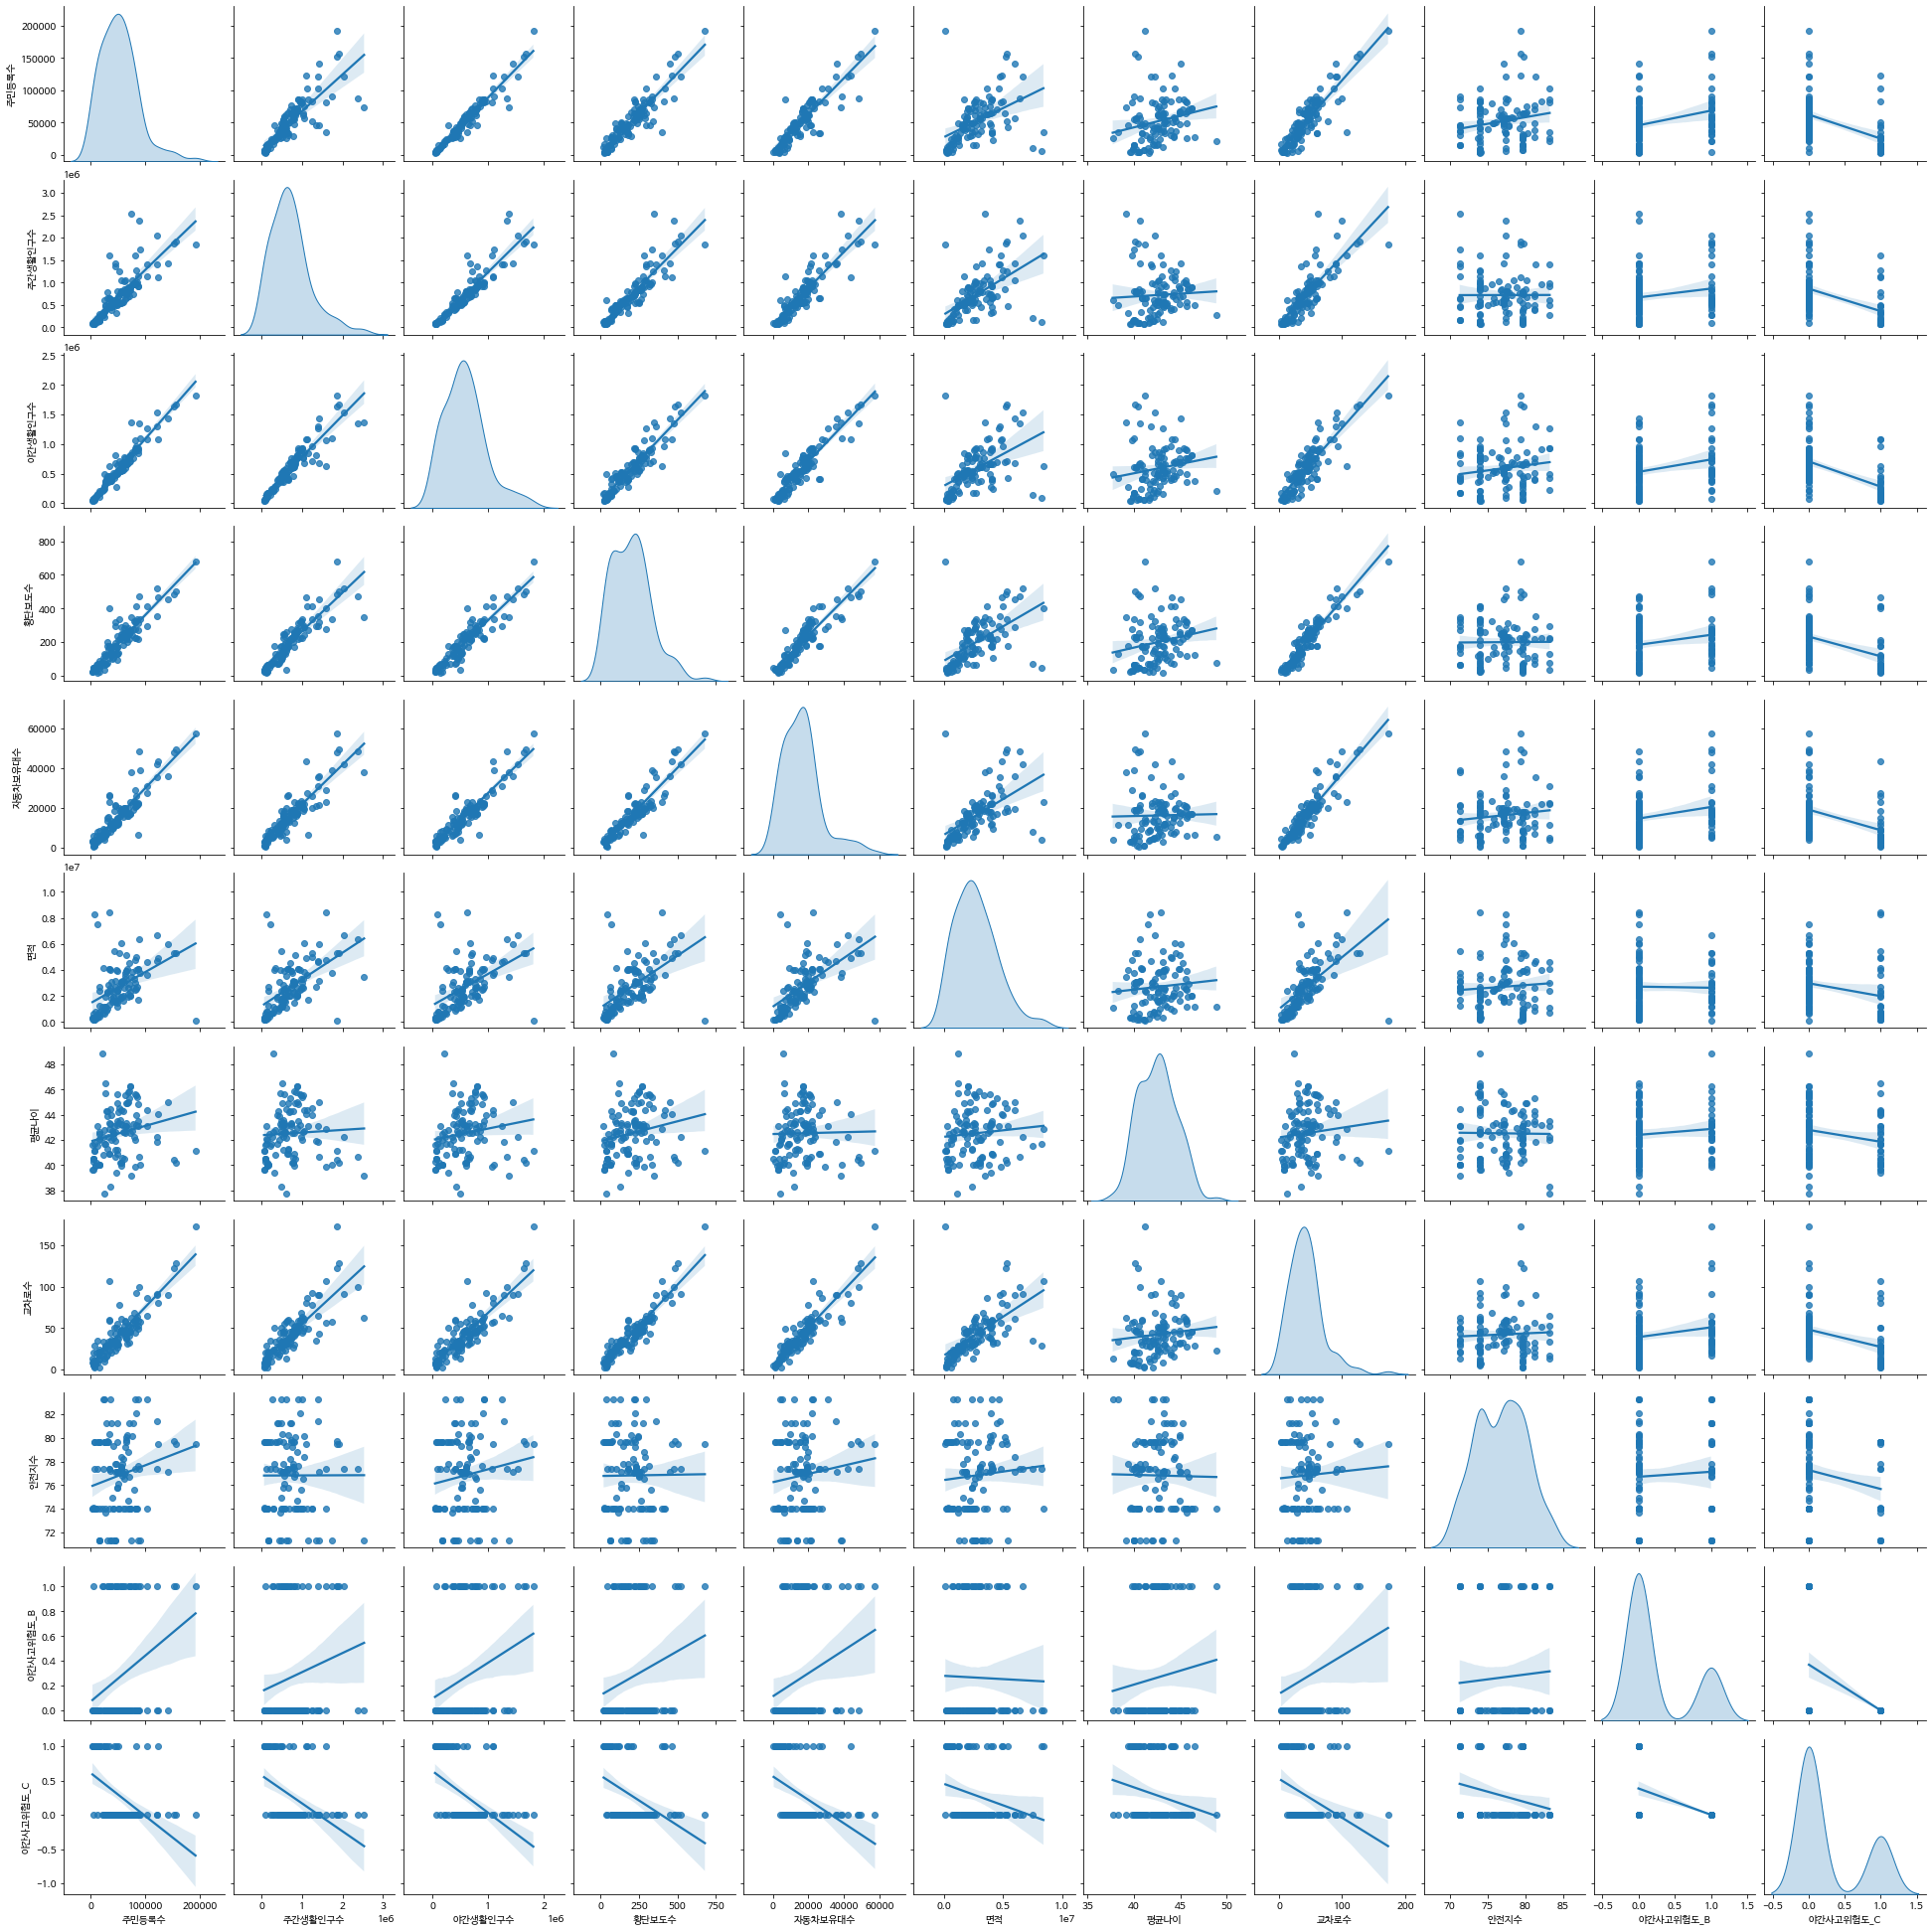

In [ ]:
# 변수의 분포 확인(변환 전)
import matplotlib.pyplot as plt
import seaborn as sns 
sns.pairplot(x1,kind="reg",diag_kind="kde")
plt.show()

In [ ]:
# 데이터 변환
x1.iloc[:,[0,1,2,3,4,5,7]] = np.sqrt(x1.iloc[:,[0,1,2,3,4,5,7]])
x1.iloc[:,6] = np.log1p(x1.iloc[:,6])

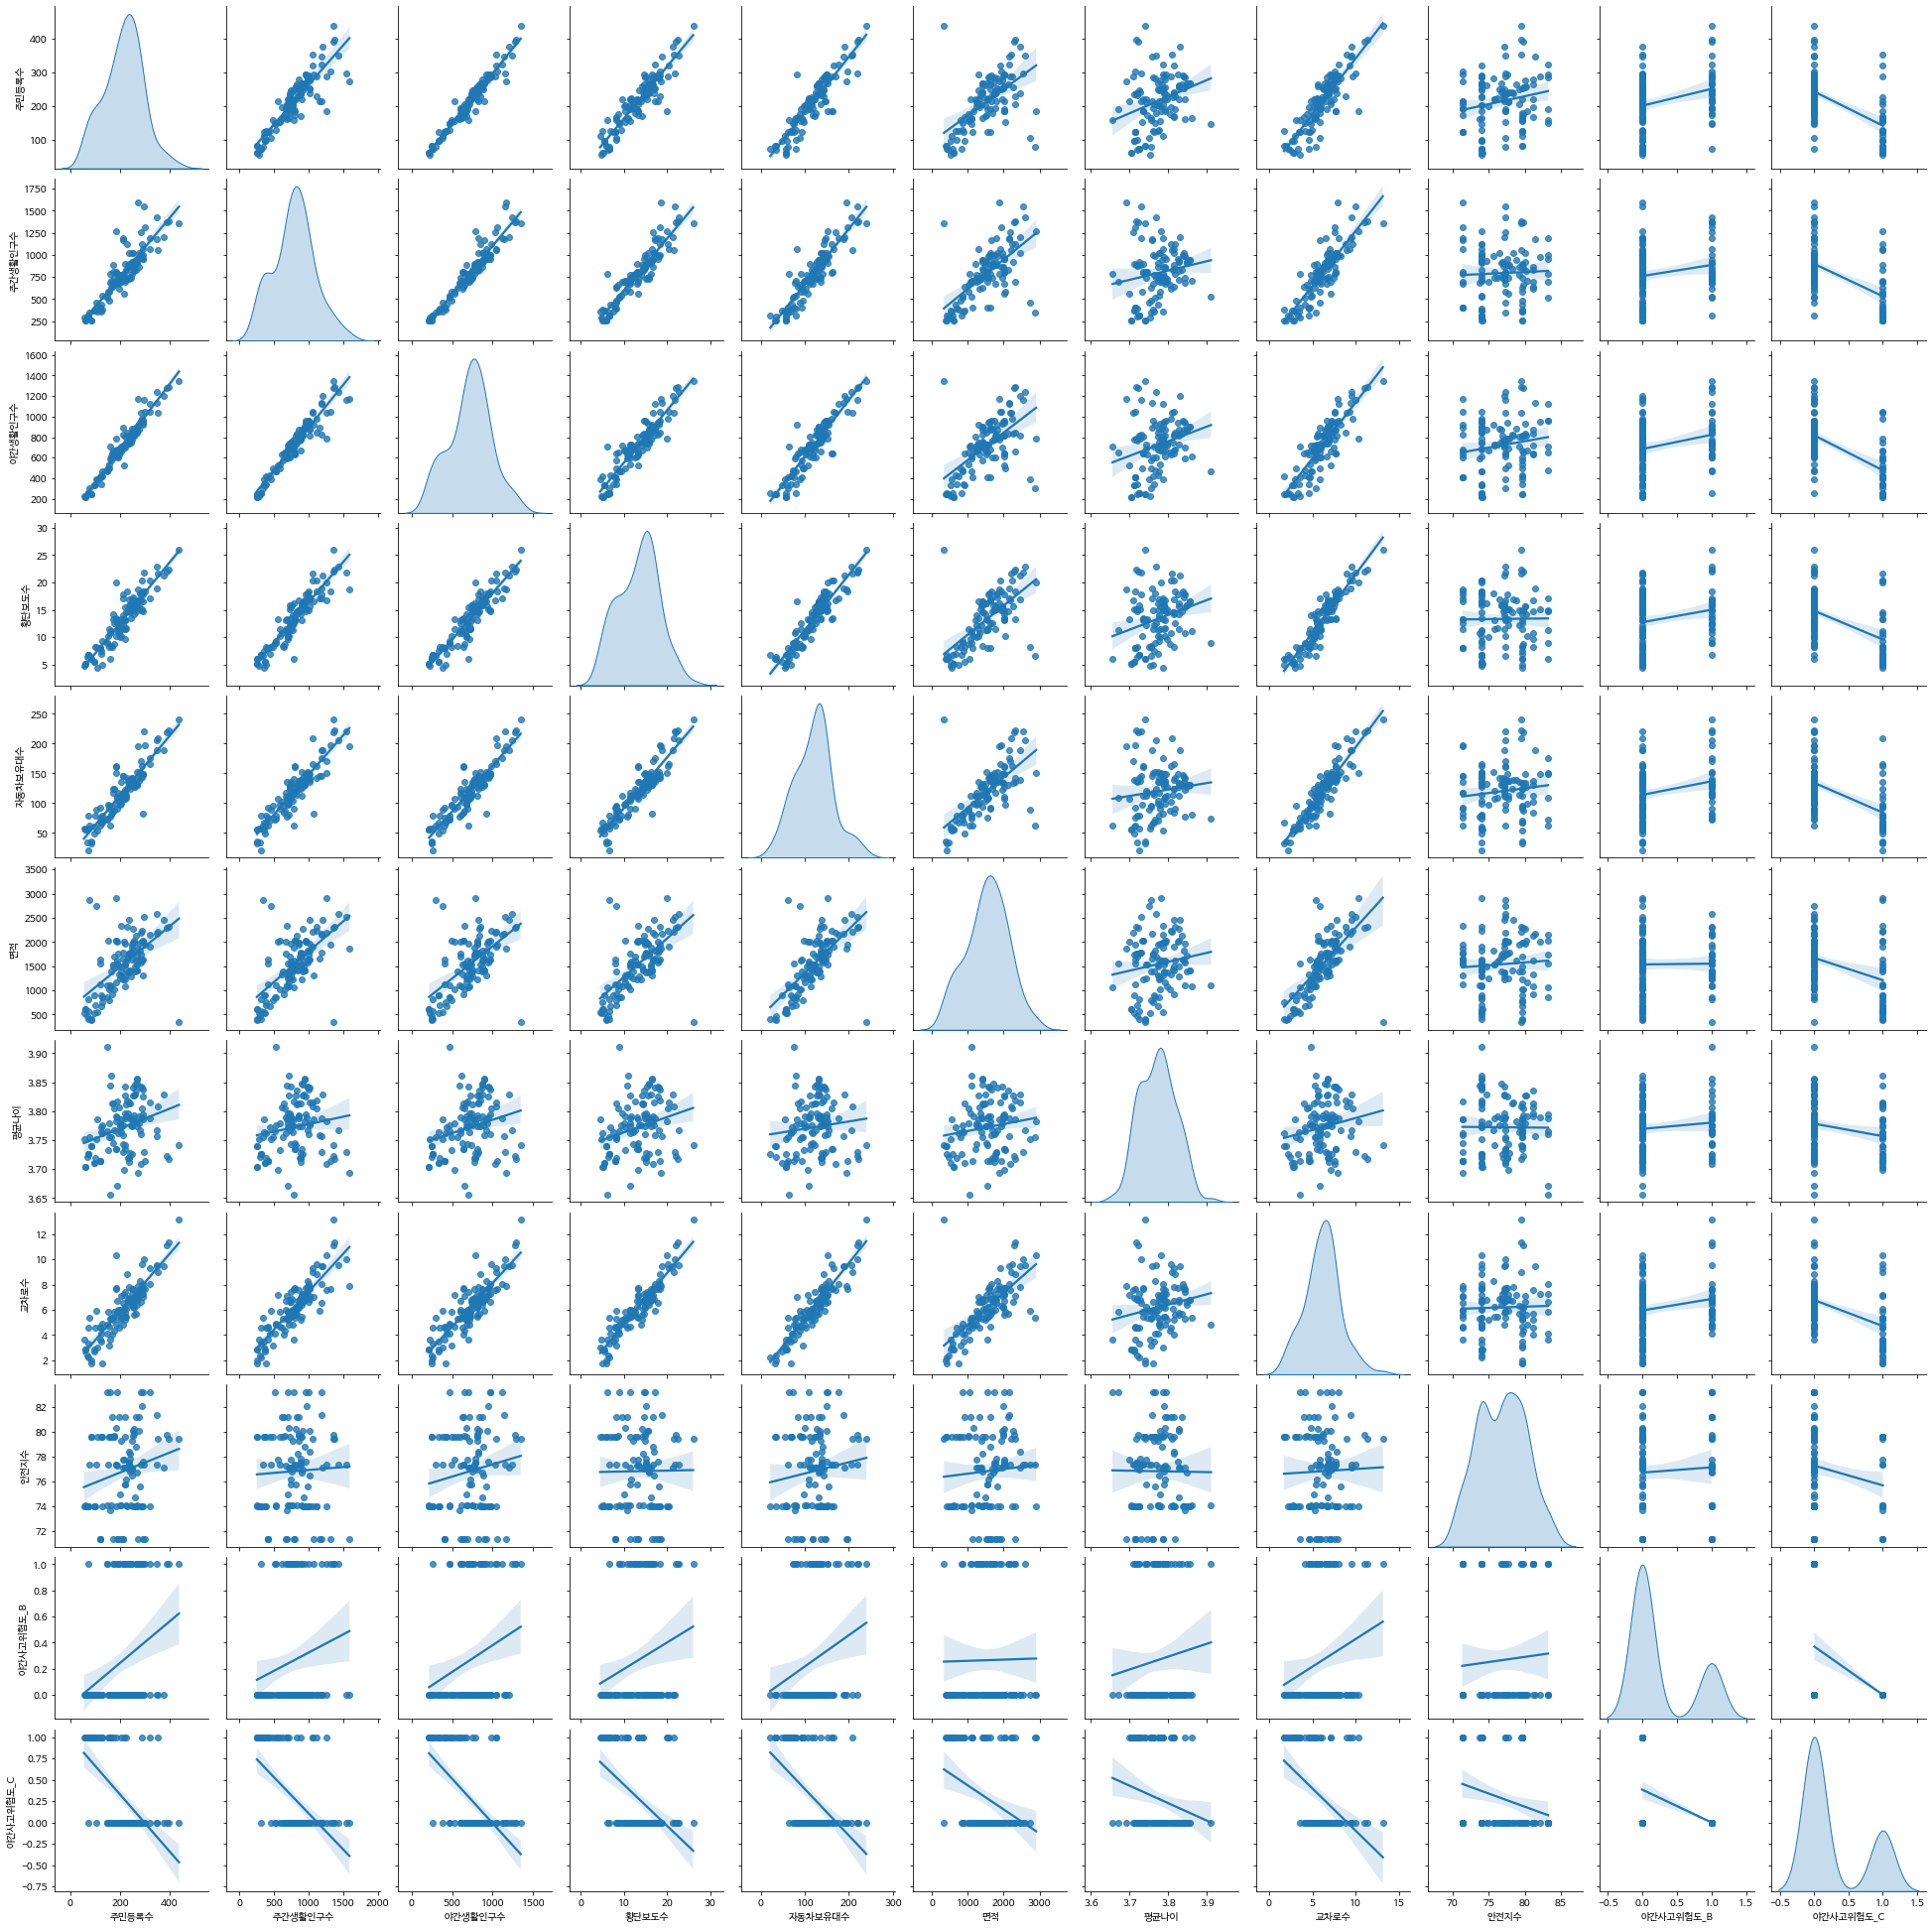

In [ ]:
# 변수의 분포 확인(변환 후, scaling 전)
import matplotlib.pyplot as plt
import seaborn as sns 
sns.pairplot(x1,kind="reg",diag_kind="kde")
plt.show()

### 전처리 후 모델링(SMOTE)

In [ ]:
# 데이터의 범위가 유사해지도록 scaling 수행

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x1.iloc[:,:9] = scaler.fit_transform(x1.iloc[:,0:9])
x1

,주민등록수,주간생활인구수,야간생활인구수,횡단보도수,자동차보유대수,면적,평균나이,교차로수,안전지수,야간사고위험도_B,야간사고위험도_C
0,-0.143209,-0.320684,-0.286585,-0.132944,0.223013,0.918416,0.163199,0.352475,-1.032028,0,1
1,-0.065108,1.095958,0.568467,0.441520,0.401535,0.082187,-0.221551,-0.137254,-1.032028,0,0
2,0.806847,1.554371,1.114596,0.601642,1.391977,0.448794,-0.849220,0.583437,-1.032028,1,0
3,-0.067484,1.186278,0.295695,0.537146,0.411974,0.251143,-0.642604,0.134690,-1.032028,0,0
4,-0.972896,-1.175100,-1.156773,-0.884936,-0.955672,-0.031420,-0.866574,-1.116946,-1.032028,0,1
...,...,...,...,...,...,...,...,...,...,...,...
112,1.689211,1.704122,1.924106,1.147867,1.807750,0.878430,-0.730992,2.050580,0.467873,1,0
113,0.201462,-0.136714,0.056814,0.240910,0.155325,-0.226898,0.192668,0.252383,-0.065946,1,0
114,0.130680,-0.212071,0.000000,0.131814,0.039931,-0.269525,0.317151,0.154146,0.000000,1,0
115,0.549817,0.673652,0.681862,0.212564,0.457504,0.467733,0.053091,0.363915,0.529806,0,0


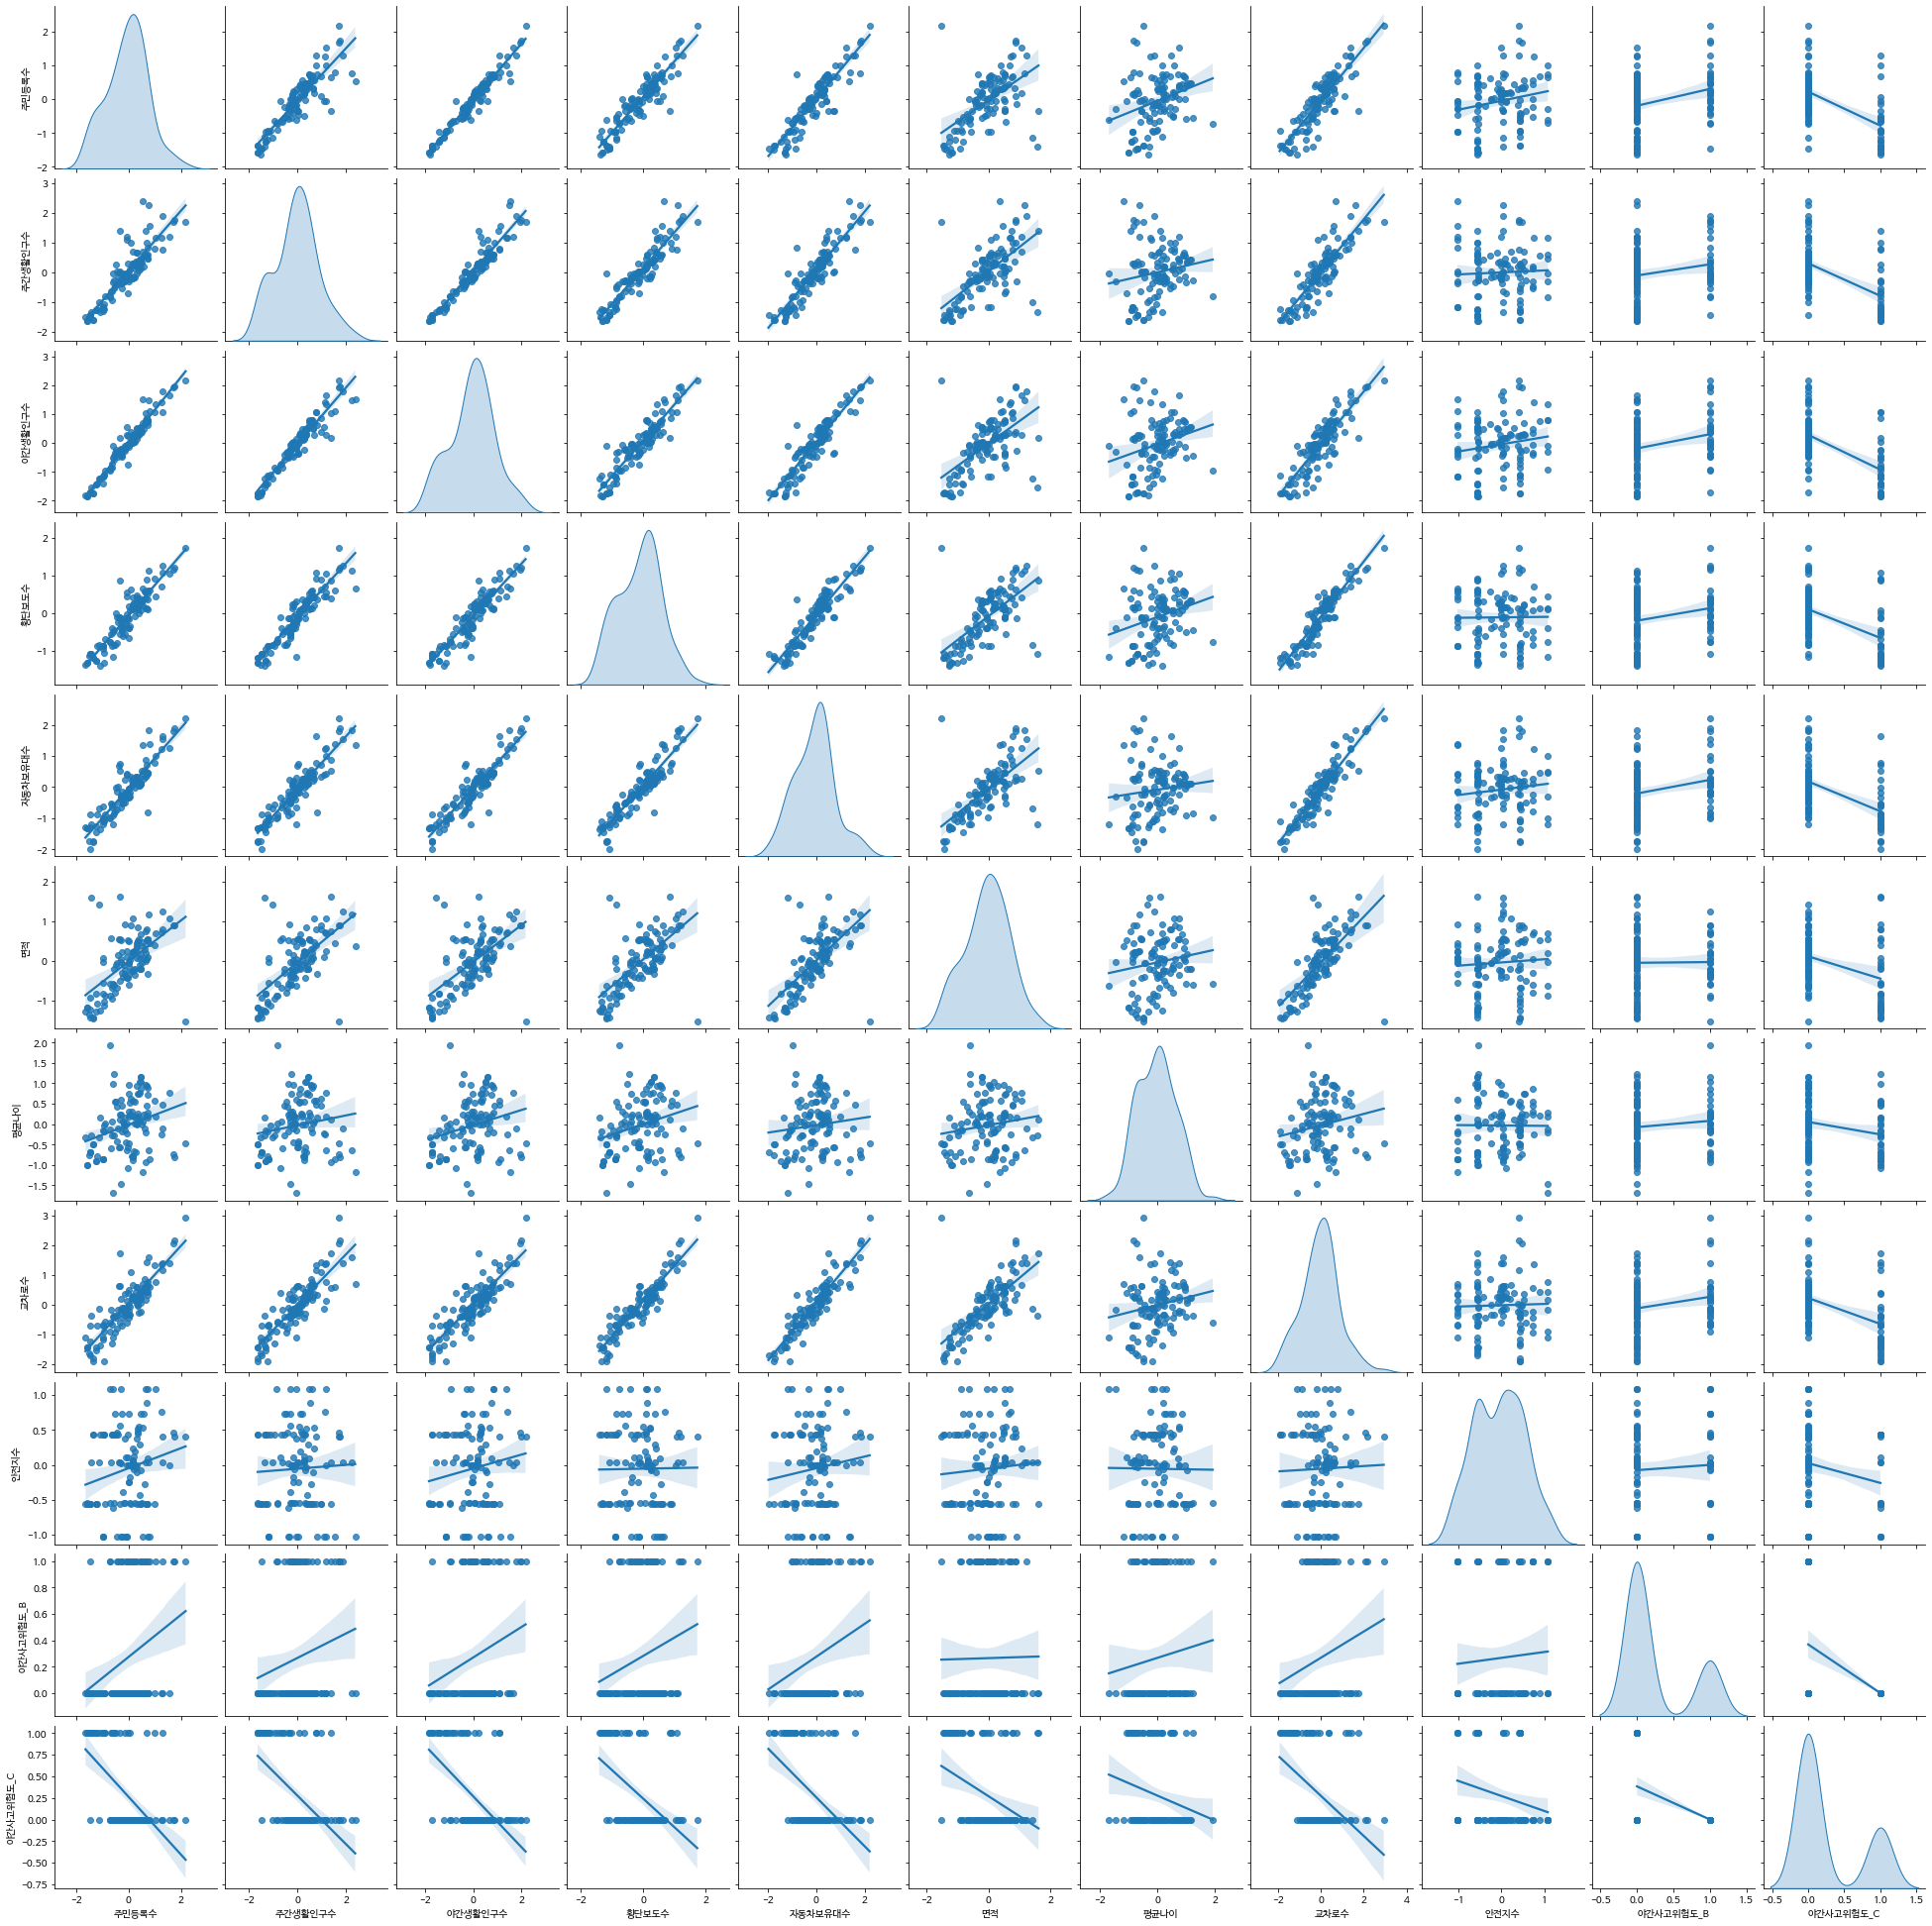

In [ ]:
# 변수의 분포 확인(scaling 후)
import matplotlib.pyplot as plt
import seaborn as sns 
sns.pairplot(x1,kind="reg",diag_kind="kde")
plt.show()

In [ ]:
x1.describe() #각 변수들의 범위가 유사해졌음을 알 수 있다.

,주민등록수,주간생활인구수,야간생활인구수,횡단보도수,자동차보유대수,면적,평균나이,교차로수,안전지수,야간사고위험도_B,야간사고위험도_C
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,-0.061071,-0.013912,-0.056791,-0.118764,-0.088591,-0.049507,-0.032351,-0.024334,-0.055499,0.264957,0.282051
std,0.782084,0.893136,0.916682,0.684890,0.832145,0.707341,0.659715,0.874106,0.578469,0.443209,0.451934
min,-1.645951,-1.635184,-1.849163,-1.407484,-1.987275,-1.523915,-1.688626,-1.911334,-1.032028,0.000000,0.000000
25%,-0.550584,-0.529986,-0.504498,-0.662329,-0.664645,-0.517495,-0.558648,-0.567119,-0.560498,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.449416,0.470014,0.495502,0.337671,0.335355,0.482505,0.441352,0.432881,0.439502,1.000000,1.000000
max,2.171485,2.386089,2.166016,1.731525,2.217096,1.622858,1.930660,2.931267,1.083630,1.000000,1.000000


#### RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state = 42)

parameters = {"n_estimators": [50, 100, 200, 500, 1000],
              "max_depth": [3, 5, 7, 9, 11],
              'min_samples_split':[2, 3, 5, 7, 9, 11, 13]
                   }

grid_search1 = GridSearchCV(estimator=rf1, 
                           param_grid=parameters, 
                           n_jobs=-1,
                           cv = cv
                          )

grid_search1.fit(x1, y1)
grid_search1.best_params_ #'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 50


{'max_depth': 11, 'min_samples_split': 2, 'n_estimators': 50}

In [ ]:
grid_search1.best_score_

0.7008547008547009

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(max_depth = 11, min_samples_split = 2, n_estimators = 50, random_state = 42)

rf1.fit(x1, y1)

RandomForestClassifier(max_depth=11, n_estimators=50, random_state=42)

In [ ]:
rf1.feature_importances_

array([0.10193289, 0.10601374, 0.13912284, 0.07679023, 0.11590429,
       0.08548918, 0.12098118, 0.08282616, 0.10087902, 0.05573207,
       0.01432841])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, precision_score
print(confusion_matrix(rf1.predict(x1),y1)) #정분류 표 confusion table(matrix)
print(classification_report(y1,rf1.predict(x1)))

[[39  0  0]
 [ 0 39  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        39
           B       1.00      1.00      1.00        39
           C       1.00      1.00      1.00        39

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117



#### XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb1 = XGBClassifier(random_state = 42)

parameters = {'max_depth': [3, 5, 7, 9, 11], 
              'subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
              "n_estimators": [50, 100, 200, 500, 1000]}

grid_search2 = GridSearchCV(estimator=xgb1, 
                           param_grid=parameters, 
                           n_jobs=-1, 
                           cv = cv
                          ) 

grid_search2.fit(x1, y1)
grid_search2.best_params_

#'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0

{'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}

In [ ]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(max_depth = 5, subsample = 1, n_estimators = 50, random_state = 42)

xgb1.fit(x1, y1)

XGBClassifier(max_depth=5, n_estimators=50, objective='multi:softprob',
              random_state=42)

In [ ]:
xgb1.feature_importances_

array([0.08570236, 0.05866973, 0.16536866, 0.05255464, 0.08923154,
       0.04774616, 0.06346805, 0.05911696, 0.07988074, 0.21897054,
       0.07929059], dtype=float32)

#### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()

gnb1.fit(x1,y1)

GaussianNB()

#### LogisticRegressor

In [ ]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',random_state = 42)

parameters = {"C":[0.001 ,0.01, 0.1, 0.5, 1, 3, 5, 10, 30, 50]}

grid_search3 = GridSearchCV(estimator=lr1, 
                           param_grid=parameters, 
                           n_jobs=-1, 
                           cv = cv
                          )

grid_search3.fit(x1, y1)
grid_search3.best_params_           

# 'C': 0.5

{'C': 0.5}

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', C = 0.5, random_state = 42)
lr1.fit(x1,y1)

LogisticRegression(C=0.5, multi_class='multinomial', random_state=42)

#### SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
import sklearn.svm as svm

svc1 = svm.SVC(random_state = 42)

parameters = {"C":[0.001 ,0.01, 0.1, 0.5, 1, 3, 5, 10, 30, 50],
              "kernel":["lenear", 'sigmoid','rbf', 'poly']}



grid_search4 = GridSearchCV(estimator=svc1, 
                           param_grid=parameters, 
                           n_jobs=-1, 
                           cv = cv
                          )

grid_search4.fit(x1, y1)
grid_search4.best_params_    

# 'C': 10, 'kernel': 'rbf'

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 

{'C': 10, 'kernel': 'rbf'}

In [ ]:
grid_search4.best_score_   

0.7435897435897436

In [ ]:
import sklearn.svm as svm
svc1 = svm.SVC(C = 10, kernel = "rbf", probability=True, random_state = 42)

svc1.fit(x1, y1)

SVC(C=50, probability=True, random_state=42)

### RandomForestClassifier 그룹 분류

In [ ]:
b1 = pd.read_csv("2021전처리완료데이터/최종데이터.csv")
b2 = pd.read_csv("2021전처리완료데이터/설치안된동.csv")
b2 = b2.rename(columns = {"0":"동"})

In [ ]:
df2 = pd.merge(b2, b1, how = "left", left_on = "동", right_on = "법정동")
df2 = df2.drop(["동"],axis = 1) # 필요없는 변수 삭제
df2 = df2.set_index("법정동") # 법정동을 인덱스로 설정
df2 = df2.rename(columns = {"group":"최적입지순위그룹"}) # group 변수 이름 변경
df2 = df2.iloc[:,[0,1,2,3,4,5,7,8,9,6]]
df2 = pd.get_dummies(df2,columns = ["야간사고위험도"],drop_first = True)
# 데이터 변환
df2.iloc[:,[0,1,2,3,4,5,7]] = np.sqrt(df2.iloc[:,[0,1,2,3,4,5,7]])
df2.iloc[:,6] = np.log1p(df2.iloc[:,6])

# 데이터의 범위가 유사해지도록 scaling 수행

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df2.iloc[:,:9] = scaler.fit_transform(df2.iloc[:,0:9])
df2
df2

,주민등록수,주간생활인구수,야간생활인구수,횡단보도수,자동차보유대수,면적,평균나이,교차로수,안전지수,야간사고위험도_B,야간사고위험도_C
법정동,,,,,,,,,,,
성산동,1.623992,1.337265,1.325349,1.490537,1.485979,1.322520,-0.284832,1.754183,0.000000,0,1
동빙고동,0.230120,-0.085785,-0.070778,-0.182742,0.002306,0.207519,-0.094093,0.193126,0.103158,0,1
영등포동6가,-0.128030,0.049870,-0.017222,0.000000,0.000000,-0.173002,-0.878630,0.277451,-0.896842,0,1
창신동,0.824715,0.906032,0.932909,0.382886,0.615818,0.493466,0.954722,0.499379,0.063158,0,1
충무로2가,-0.386444,-0.334747,-0.485747,-0.377903,-0.295759,-0.224633,1.173519,-0.859312,-0.901053,0,1
...,...,...,...,...,...,...,...,...,...,...,...
개봉동,2.324391,1.981713,2.078667,2.183341,2.504710,1.457456,0.398320,1.958130,-0.284211,0,0
만리동1가,-0.190677,-0.260109,-0.263553,-0.126826,-0.060464,-0.222746,-0.046942,-0.429656,-0.901053,0,1
회현동2가,-0.257278,-0.003176,-0.319076,0.113060,0.138231,-0.221532,1.350161,-0.429656,-0.901053,0,1


In [ ]:
rf1_label = rf1.predict(df2) #랜덤포레스트 예측 라벨값
rf1_max_proba = rf1.predict_proba(df2).max(axis=1) # 예측 라벨값의 확률

rf1_lab = pd.DataFrame(rf1_label, columns = ["label"])
rf1_mp = pd.DataFrame(rf1_max_proba, columns = ["prob"])

rf1_label = pd.concat([rf1_lab, rf1_mp], axis = 1).set_index(df2.index) # 데이터 결합 및 인덱스 설정

rf1_label

,label,prob
법정동,,
성산동,B,0.471204
동빙고동,A,0.599009
영등포동6가,A,0.405924
창신동,A,0.614535
충무로2가,C,0.451965
...,...,...
개봉동,C,0.468789
만리동1가,C,0.460916
회현동2가,B,0.386939


In [ ]:
rf1_label = rf1_label[rf1_label.label == "A"].sort_values("prob", ascending = False)

#rf1_label.to_csv("RandomForest_label3.csv")

### XGBClassifier 그룹 분류

In [ ]:
xgb1_label = xgb1.predict(df2) #랜덤포레스트 예측 라벨값
xgb1_max_proba = xgb1.predict_proba(df2).max(axis=1) # 예측 라벨값의 확률

xgb1_lab = pd.DataFrame(xgb1_label, columns = ["label"])
xgb1_mp = pd.DataFrame(xgb1_max_proba, columns = ["prob"])

xgb1_label = pd.concat([xgb1_lab, xgb1_mp], axis = 1).set_index(df2.index) # 데이터 결합 및 인덱스 설정

xgb1_label

,label,prob
법정동,,
성산동,C,0.690285
동빙고동,A,0.974654
영등포동6가,B,0.588887
창신동,A,0.731095
충무로2가,C,0.913874
...,...,...
개봉동,C,0.551968
만리동1가,C,0.805476
회현동2가,C,0.720274


In [ ]:
xgb1_label = xgb1_label[xgb1_label.label == "A"].sort_values("prob",ascending = False)

#xgb1_label.to_csv("XGBClassifier_label3.csv")

###  GaussianNB 그룹 분류

In [ ]:
gnb1_label = gnb1.predict(df2) #랜덤포레스트 예측 라벨값
gnb1_max_proba = gnb1.predict_proba(df2).max(axis=1) # 예측 라벨값의 확률

gnb1_lab = pd.DataFrame(gnb1_label, columns = ["label"])
gnb1_mp = pd.DataFrame(gnb1_max_proba, columns = ["prob"])

gnb1_label = pd.concat([gnb1_lab, gnb1_mp], axis = 1).set_index(df2.index) # 데이터 결합 및 인덱스 설정

gnb1_label

,label,prob
법정동,,
성산동,B,0.999456
동빙고동,A,0.574263
영등포동6가,C,0.606262
창신동,B,0.596704
충무로2가,C,0.880800
...,...,...
개봉동,B,0.999994
만리동1가,C,0.713940
회현동2가,C,0.650230


In [ ]:
gnb1_label = gnb1_label[gnb1_label.label == "A"].sort_values("prob",ascending = False)

#gnb1_label.to_csv("gnb_label3.csv")

### LogisticRegression 그룹 분류

In [ ]:
lr1_label = lr1.predict(df2) #랜덤포레스트 예측 라벨값
lr1_max_proba = lr1.predict_proba(df2).max(axis=1) # 예측 라벨값의 확률

lr1_lab = pd.DataFrame(lr1_label, columns = ["label"])
lr1_mp = pd.DataFrame(lr1_max_proba, columns = ["prob"])

lr1_label = pd.concat([lr1_lab, lr1_mp], axis = 1).set_index(df2.index) # 데이터 결합 및 인덱스 설정

lr1_label

,label,prob
법정동,,
성산동,B,0.522423
동빙고동,B,0.430842
영등포동6가,B,0.498482
창신동,A,0.521301
충무로2가,A,0.422605
...,...,...
개봉동,A,0.808505
만리동1가,C,0.407611
회현동2가,A,0.451885


In [ ]:
lr1_label = lr1_label[lr1_label.label == "A"].sort_values("prob",ascending = False)

#lr1_label.to_csv("LogisticRegression_label3.csv")

### SVC 그룹 분류

In [ ]:
svc1_label = svc1.predict(df2) #랜덤포레스트 예측 라벨값
svc1_max_proba = svc1.predict_proba(df2).max(axis=1) # 예측 라벨값의 확률

svc1_lab = pd.DataFrame(svc1_label, columns = ["label"])
svc1_mp = pd.DataFrame(svc1_max_proba, columns = ["prob"])

svc1_label = pd.concat([svc1_lab, svc1_mp], axis = 1).set_index(df2.index) # 데이터 결합 및 인덱스 설정

svc1_label

,label,prob
법정동,,
성산동,C,0.755017
동빙고동,A,0.456075
영등포동6가,A,0.478935
창신동,A,0.515085
충무로2가,B,0.554038
...,...,...
개봉동,C,0.663611
만리동1가,B,0.690190
회현동2가,B,0.625707


In [ ]:
svc1_label = svc1_label[svc1_label.label == "A"].sort_values("prob",ascending = False)

#svc1_label.to_csv("SVC_label3.csv")